In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

path = "/content/drive/MyDrive/Wind_ERA5/wind_master_2015_2024.csv"

wind_master = pd.read_csv(path)
wind_master["datetime"] = pd.to_datetime(wind_master["datetime"])

wind_master.head()


,datetime,wind_speed_100m,wind_direction,t2m,sp
0,2015-01-01 00:00:00,6.537967,240.28653,295.28668,100856.266
1,2015-01-01 01:00:00,6.903614,232.82164,295.15660,100922.310
2,2015-01-01 02:00:00,6.771497,224.10149,295.49374,100982.790
3,2015-01-01 03:00:00,6.230996,219.54883,295.38098,101037.280
4,2015-01-01 04:00:00,5.271079,219.51834,295.23727,101047.440


In [4]:
#long term mean wind

mean_wind = wind_master["wind_speed_100m"].mean()
std_wind = wind_master["wind_speed_100m"].std()

print("Long-Term Mean Wind Speed:", round(mean_wind, 3), "m/s")
print("Standard Deviation:", round(std_wind, 3), "m/s")


Long-Term Mean Wind Speed: 4.637 m/s
Standard Deviation: 2.122 m/s


In [5]:
#Annual variation

wind_master["year"] = wind_master["datetime"].dt.year

annual_avg = wind_master.groupby("year")["wind_speed_100m"].mean()

annual_avg


,wind_speed_100m
year,
2015,4.768198
2016,4.510646
2017,4.708177
2018,4.529494
2019,4.537071
2020,4.621036
2021,4.592909
2022,4.480491
2023,4.640603


In [6]:
#monthly seasonal pattern

wind_master["month"] = wind_master["datetime"].dt.month

monthly_avg = wind_master.groupby("month")["wind_speed_100m"].mean()

monthly_avg


,wind_speed_100m
month,
1,4.587676
2,4.469627
3,4.515536
4,4.318258
5,4.405714
6,5.793916
7,6.435967
8,5.723790
9,4.271431


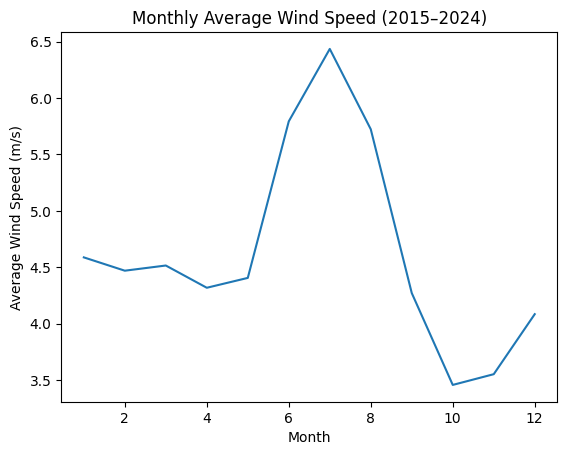

In [7]:
#Monthly Average Wind Speed Plot

import matplotlib.pyplot as plt

plt.figure()
monthly_avg.plot()
plt.xlabel("Month")
plt.ylabel("Average Wind Speed (m/s)")
plt.title("Monthly Average Wind Speed (2015–2024)")
plt.show()


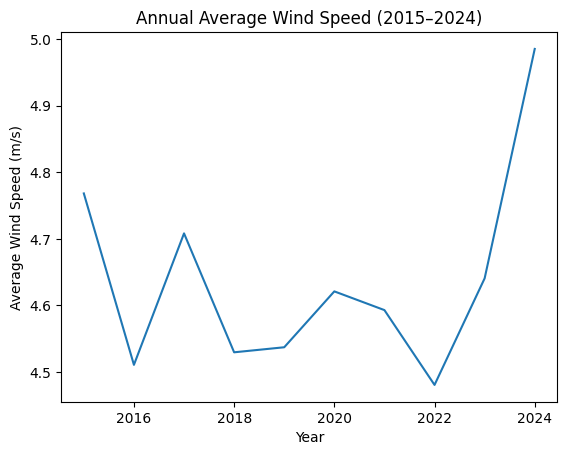

In [8]:
#Annual Average Wind Speed Plot

plt.figure()
annual_avg.plot()
plt.xlabel("Year")
plt.ylabel("Average Wind Speed (m/s)")
plt.title("Annual Average Wind Speed (2015–2024)")
plt.show()


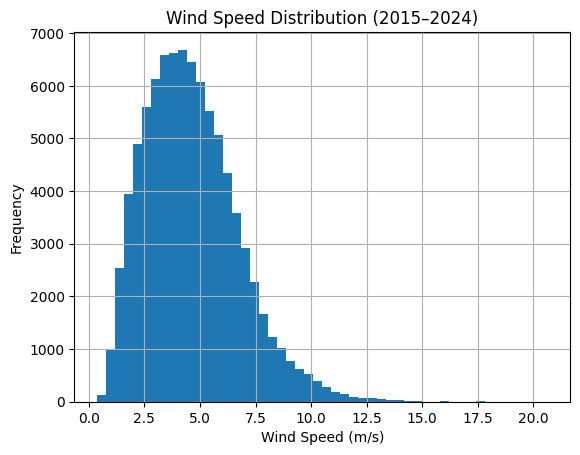

In [9]:
#Wind Speed Distribution

plt.figure()
wind_master["wind_speed_100m"].hist(bins=50)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.title("Wind Speed Distribution (2015–2024)")
plt.show()


In [10]:
!pip install -q scipy


In [11]:
#Fit Weibull Distribution

import numpy as np
from scipy.stats import weibull_min

# Extract wind speed values
wind_speed = wind_master["wind_speed_100m"].values

# Fit Weibull (force location = 0)
shape_k, loc, scale_c = weibull_min.fit(wind_speed, floc=0)

print("Weibull Shape Parameter (k):", round(shape_k, 3))
print("Weibull Scale Parameter (c):", round(scale_c, 3))


Weibull Shape Parameter (k): 2.321
Weibull Scale Parameter (c): 5.243


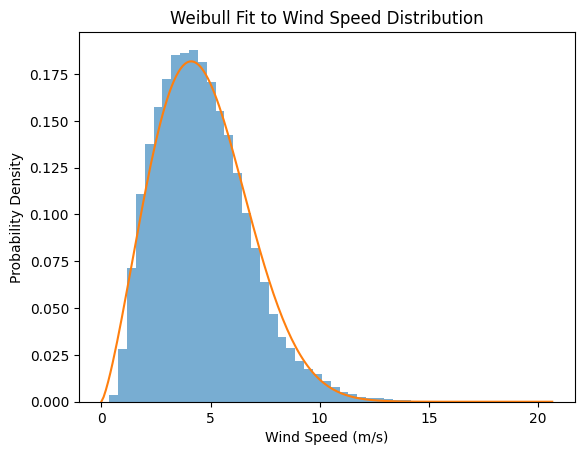

In [12]:
import matplotlib.pyplot as plt

# Create wind speed range
x = np.linspace(0, wind_speed.max(), 200)

# Weibull PDF
pdf = weibull_min.pdf(x, shape_k, loc=0, scale=scale_c)

plt.figure()
plt.hist(wind_speed, bins=50, density=True, alpha=0.6)
plt.plot(x, pdf)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Probability Density")
plt.title("Weibull Fit to Wind Speed Distribution")
plt.show()


In [13]:
from scipy.special import gamma

rho = 1.225  # air density kg/m^3

WPD = 0.5 * rho * (scale_c**3) * gamma(1 + 3/shape_k)

print("Wind Power Density (W/m^2):", round(WPD, 2))


Wind Power Density (W/m^2): 102.54


In [14]:
# Monthly wind power density

monthly_wpd = wind_master.groupby("month")["wind_speed_100m"].apply(
    lambda v: 0.5 * rho * np.mean(v**3)
)

monthly_wpd


,wind_speed_100m
month,
1,79.064623
2,76.947301
3,87.016944
4,73.690628
5,104.487780
6,169.901417
7,220.976282
8,172.823707
9,99.554261


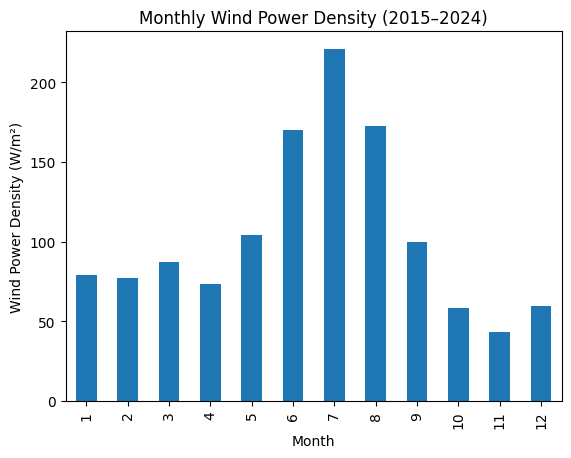

In [15]:
import matplotlib.pyplot as plt
import numpy as np

rho = 1.225

monthly_wpd = wind_master.groupby("month")["wind_speed_100m"].apply(
    lambda v: 0.5 * rho * np.mean(v**3)
)

plt.figure()
monthly_wpd.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Wind Power Density (W/m²)")
plt.title("Monthly Wind Power Density (2015–2024)")
plt.show()


In [16]:
# Extract hour
wind_master["hour"] = wind_master["datetime"].dt.hour

# Hourly average wind speed
hourly_avg = wind_master.groupby("hour")["wind_speed_100m"].mean()

hourly_avg


,wind_speed_100m
hour,
0,4.485272
1,4.414839
2,4.251353
3,4.101257
4,4.083818
5,4.141315
6,4.347881
7,4.674757
8,4.992896


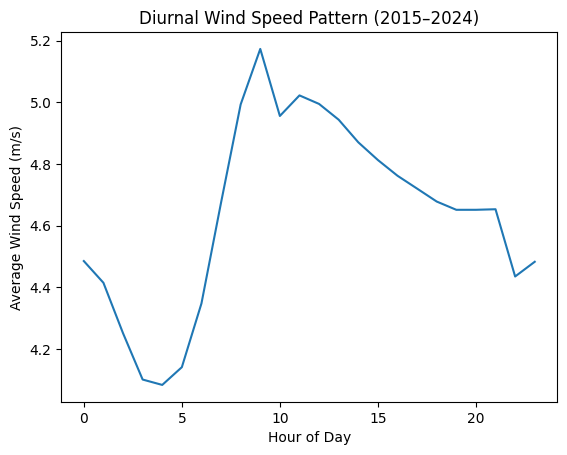

In [17]:
import matplotlib.pyplot as plt

plt.figure()
hourly_avg.plot()
plt.xlabel("Hour of Day")
plt.ylabel("Average Wind Speed (m/s)")
plt.title("Diurnal Wind Speed Pattern (2015–2024)")
plt.show()


In [19]:
!pip install -q windrose


<Figure size 640x480 with 0 Axes>

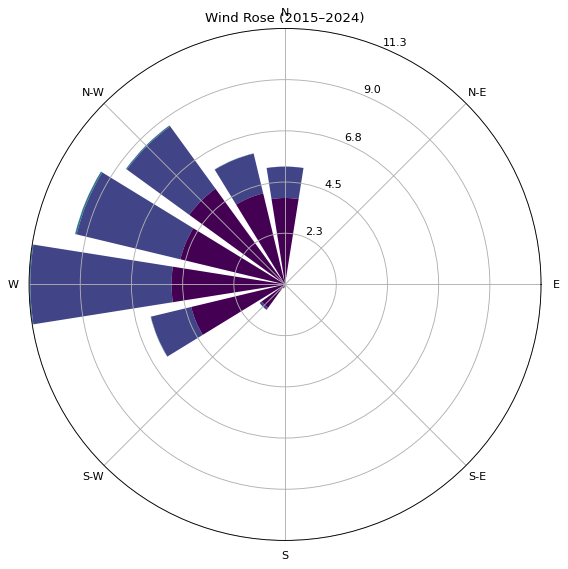

In [20]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Extract data
wd = wind_master["wind_direction"]
ws = wind_master["wind_speed_100m"]

fig = plt.figure()
ax = WindroseAxes.from_ax()

ax.bar(wd, ws, normed=True, opening=0.8)

ax.set_title("Wind Rose (2015–2024)")

plt.show()


In [21]:
import numpy as np

def turbine_power(v):
    if v < 3:
        return 0
    elif v < 12:
        return ((v - 3) / (12 - 3))  # linear ramp
    elif v <= 25:
        return 1
    else:
        return 0

# Vectorize
turbine_power_vec = np.vectorize(turbine_power)

# Apply to dataset
wind_master["normalized_power"] = turbine_power_vec(wind_master["wind_speed_100m"])

# Capacity Factor
capacity_factor = wind_master["normalized_power"].mean()

print("Estimated Capacity Factor:", round(capacity_factor, 3))


Estimated Capacity Factor: 0.204


In [22]:
import numpy as np

v = wind_master["wind_speed_100m"]

max_v = v.max()
p99 = np.percentile(v, 99)
p95 = np.percentile(v, 95)

gt15 = (v > 15).mean() * 100
gt20 = (v > 20).mean() * 100

print("Max wind speed (m/s):", round(max_v, 2))
print("95th percentile (m/s):", round(p95, 2))
print("99th percentile (m/s):", round(p99, 2))
print("% of hours > 15 m/s:", round(gt15, 3), "%")
print("% of hours > 20 m/s:", round(gt20, 3), "%")


Max wind speed (m/s): 20.65
95th percentile (m/s): 8.47
99th percentile (m/s): 10.71
% of hours > 15 m/s: 0.042 %
% of hours > 20 m/s: 0.002 %


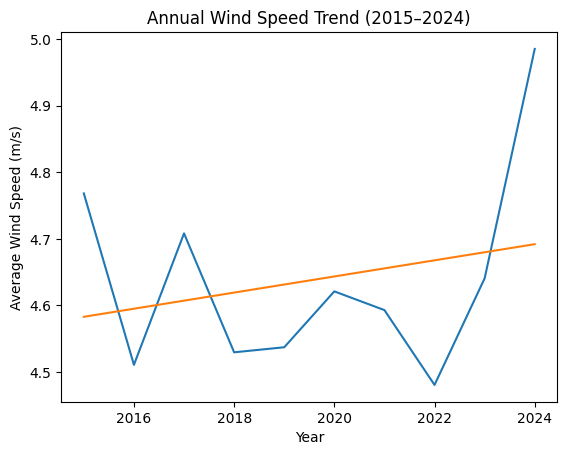

Trend slope (m/s per year): 0.0121


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Annual average already computed
annual_avg = wind_master.groupby("year")["wind_speed_100m"].mean()

# Fit linear trend
years = annual_avg.index.values
values = annual_avg.values

coeff = np.polyfit(years, values, 1)
trend_line = np.poly1d(coeff)

plt.figure()
plt.plot(years, values)
plt.plot(years, trend_line(years))
plt.xlabel("Year")
plt.ylabel("Average Wind Speed (m/s)")
plt.title("Annual Wind Speed Trend (2015–2024)")
plt.show()

print("Trend slope (m/s per year):", round(coeff[0], 4))


In [24]:
mean_v = wind_master["wind_speed_100m"].mean()
std_v = wind_master["wind_speed_100m"].std()

TI = std_v / mean_v

print("Mean wind speed:", round(mean_v, 3))
print("Std deviation:", round(std_v, 3))
print("Turbulence Intensity (TI):", round(TI, 3))


Mean wind speed: 4.637
Std deviation: 2.122
Turbulence Intensity (TI): 0.458


In [25]:
yearly_stats = wind_master.groupby("year")["wind_speed_100m"].agg(["mean", "std"])
yearly_stats["TI"] = yearly_stats["std"] / yearly_stats["mean"]

yearly_stats


,mean,std,TI
year,,,
2015,4.768198,2.261910,0.474374
2016,4.510646,2.081797,0.461530
2017,4.708177,2.157953,0.458342
2018,4.529494,2.003314,0.442282
2019,4.537071,2.131595,0.469818
2020,4.621036,2.152277,0.465756
2021,4.592909,2.091180,0.455306
2022,4.480491,1.963880,0.438318
2023,4.640603,2.091423,0.450679


In [26]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib.pyplot as plt

# Mean wind speed
mean_v = wind_master["wind_speed_100m"].mean()

# Rayleigh scale parameter
c_rayleigh = mean_v / np.sqrt(np.pi / 2)

print("Rayleigh scale parameter:", round(c_rayleigh, 3))


Rayleigh scale parameter: 3.7


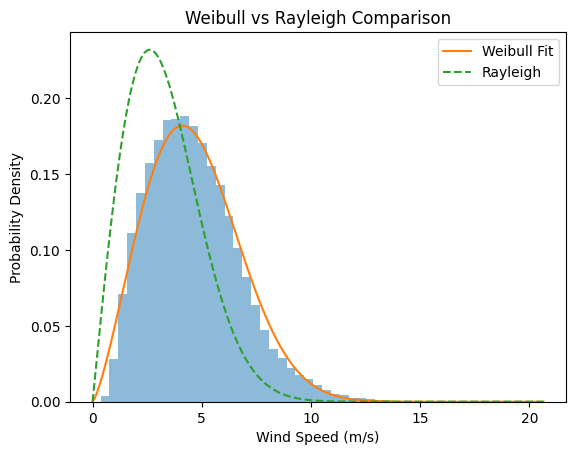

In [27]:
# Wind data
v = wind_master["wind_speed_100m"].values

# Weibull parameters (from before)
k_weibull = shape_k
c_weibull = scale_c

# Rayleigh parameters
k_rayleigh = 2

# Range
x = np.linspace(0, v.max(), 200)

# PDFs
pdf_weibull = weibull_min.pdf(x, k_weibull, scale=c_weibull)
pdf_rayleigh = weibull_min.pdf(x, k_rayleigh, scale=c_rayleigh)

plt.figure()
plt.hist(v, bins=50, density=True, alpha=0.5)
plt.plot(x, pdf_weibull, label="Weibull Fit")
plt.plot(x, pdf_rayleigh, linestyle="--", label="Rayleigh")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Probability Density")
plt.title("Weibull vs Rayleigh Comparison")
plt.legend()
plt.show()
